<a href="https://colab.research.google.com/github/harveyrutland/pdf_scanner/blob/main/paper_scanner_ML_algorithmns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Library installation 
%%capture
!pip install pdfminer
!pip install fitz
!pip install frontend
!pip install PyMuPDF
!pip install PyPDF2 pdfquery

**Script function operations:**
*   pdf to text
*   highlight text
*   get highlighted words from text
*   match returned to key word dictionary and return reference key 



In [40]:
#@title Functions 
import re
from io import StringIO
from pdfminer.layout import LAParams
from pdfminer.converter import PDFPageAggregator
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
import os
import fitz
import pdfquery
import PyPDF2
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd 

def pdf_to_text(pdf_file):
    """
    Extracts text from a PDF file and returns it as a list of strings (one string per page).
    """
    text = []
    with open(pdf_file, 'rb') as fh:
        # Create a PDF resource manager object that stores shared resources
        rsrcmgr = PDFResourceManager()
        # Create a layout analyzer object
        laparams = LAParams()
        device = PDFPageAggregator(rsrcmgr, laparams=laparams)
        # Create a PDF interpreter object
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        # Extract text from each page and append it to the text list
        for page in PDFPage.get_pages(fh, caching=True, check_extractable=True):
            interpreter.process_page(page)
            layout = device.get_result()
            for lt_obj in layout:
                if hasattr(lt_obj, "get_text"):
                    text.append(lt_obj.get_text())
    
    return text

def highlight_text(words, file, output_file):
  doc = fitz.open(file)

  for page in doc:
      ### SEARCH

      texts = words
      
      for text in texts:
        text_instances = page.search_for(text)
        ### HIGHLIGHT
        for inst in text_instances:
            highlight = page.add_highlight_annot(inst)
            highlight.update()
        
      
      



  ### OUTPUT
  doc.save(output_file, garbage=4, deflate=True, clean=True)

def get_highlighted_words(file_path):
    # Open the PDF file using PyMuPDF
    pdf = fitz.open(file_path)

    # Initialize a list to store the highlighted words
    highlighted_words = []
    title = []

    # Loop through each page in the PDF file
    for page_num in range(len(pdf)):
        page = pdf[page_num]

        # Get the list of annotations on the page
        annotations = page.annots()

        # Loop through each annotation on the page
        for annot in annotations:
          
       
             
          if annot.type == (8, 'Highlight'):
              # Get the text within the bounding box of the highlight
              text = page.get_text("text", annot.rect)
              # print(f"highlighted:'{page.get_textbox(annot.rect)}'")

              # Append the text to the list of highlighted words
              highlighted_words.append(text)
          else:
            text = annot.info ["content"] 
            print(text)

    

    # # Close the PDF file
    # pdf.close()

    # Return the list of highlighted words
    return highlighted_words




def match_word(word):
    word = word.lower()
    for model, variants in models.items():
        if word in [variant.lower() for variant in variants]:
            return model
    return None

In [3]:
#@title Search dictionary

models = {
    "Linear Regression": ["Linear Regression", "LR","Simple Linear Regression","Multiple Linear Regression"],
    "Logistic Regression": ["Logistic Regression", "LogReg","Binary Logistic Regression","Multinomial Logistic Regression","Ordinal Logistic Regression"],
    "Decision Trees": ["Decision Trees", "DT","CART","ID3","C4.5","CHAID","Random Forest"],
    "Random Forest": ["Random Forest", "RF","RandomForest","Random Forest Classifier","Random Forest Regressor"],
    "Gradient Boosting": ["GB","GBM","LightGBM","CatBoost"],
    "Support Vector Machine (SVM)": ["SVM", "Support Vector Machine","Linear SVM","Non-Linear SVM"],
    "k-Nearest Neighbors (k-NN)": ["k-NN", "k-Nearest Neighbors","KNN"],
    "Neural Networks": ["NN", "Neural Network", "MLP", "Perception","CNN","RNN","DNN","Autoencoder","Deep Belief Networks", "deep learning"],
    "Naive Bayes": ["Naive Bayes", "NB","Gaussian Naive Bayes","Multinomial Naive Bayes","Bernoulli Naive Bayes"],
    "k-Means Clustering": ["k-Means", "KMeans"],
    "Principal Component Analysis (PCA)": ["PCA"],
    "Singular Value Decomposition (SVD)": ["SVD"],
    "Latent Dirichlet Allocation (LDA)": ["LDA"],
    "t-Distributed Stochastic Neighbor Embedding (t-SNE)": ["t-SNE","tSNE"],
    "Generative Adversarial Networks (GAN)": ["GAN","Generative Adversarial Networks"],
    "Autoencoder": ["Autoencoder","AE","Autoencoders"],
    "Q-Learning, Reinforcement Learning": ["Q-Learning","Reinforcement Learning","RL"],
    "Bagging, Boosting, AdaBoost": ["Bagging","Boosting","AdaBoost"],
    "Markov Chain Monte Carlo (MCMC)": ["MCMC","Markov Chain Monte Carlo"],
    "Hidden Markov Models": ["HMM","Hidden Markov Models"],
    "Conditional Random Fields": ["CRF","Conditional Random Fields"],
    "Boltzmann Machines": ["BM","Boltzmann Machines"],
    "Random Projection": ["Random Projection","RP"],
    "Gaussian Mixture Model": ["GMM","Gaussian Mixture Model"],
    "Variational Autoencoder": ["VAE","Variational Autoencoder"],
    "Extreme Gradient Boosting": ["XGBoost","LightGBM","CatBoost"],
    "BERT, GPT, transformer-based models": ["BERT","GPT","transformer-based models"]
    }

In [44]:
#@title scan pdfs in this folder location
# Assume that the location of your PDF files is stored in the variable pdf_dir
pdf_dir = "/content/drive/MyDrive/PhD/Survey_Paper/" #@param {type:"string"}

# Use the os.listdir() function to get a list of all files in the directory
pdf_files = os.listdir(pdf_dir)

# Iterate over the list of files
for pdf_file_name in pdf_files:
    # Check if the file is a PDF
    if pdf_file_name.endswith(".pdf"):
        # Print the name of the file
        # print(pdf_file)

        pdf_file = pdf_dir + str(pdf_file_name)
        papers = pdf_to_text(pdf_file)


          


        combined = []

        # Iterate over the papers
        paper_models = []





        for paper in papers:
            

            # Iterate over the models dictionary
            for model_type, model_synonyms in models.items():
                # Iterate over the synonyms of the model
                for model_synonym in model_synonyms:
                    # Check if the synonym is in the paper text
                    if re.search(r"\b"+model_synonym+r"\b", paper):
                      paper_models.append(model_type)
            


        paper_models = list( dict.fromkeys(paper_models))
        print(pdf_file_name, paper_models)

        # # test the function
        highlight_ls = []
        for model in paper_models:
          # print('*******')
          # print(model)
          # print('*******')
          for v in models[model]:
            # print(v)
            highlight_ls.append(v)

        


        # print(highlight_ls)
        
        print(pdf_file)

        split_pdf_file  = pdf_file.split('/')
        split_pdf_file_loc = split_pdf_file[0:-1]
        split_pdf_file_end = split_pdf_file[-1]

        print(split_pdf_file_loc)
        print(split_pdf_file_end)

        new_loc = "/".join(split_pdf_file_loc)
        output_loc = new_loc + '/pdf_output_location/output_' + split_pdf_file_end

  


        highlight_text(highlight_ls, pdf_file, output_loc)

1-s2.0-S2214785322027699-main.pdf ['Neural Networks', 'Support Vector Machine (SVM)', 'Random Forest', 'k-Nearest Neighbors (k-NN)']
/content/drive/MyDrive/PhD/Survey_Paper/1-s2.0-S2214785322027699-main.pdf
['', 'content', 'drive', 'MyDrive', 'PhD', 'Survey_Paper']
1-s2.0-S2214785322027699-main.pdf
1-s2.0-S0043135421008915-main.pdf ['Neural Networks', 'Random Forest', 'Support Vector Machine (SVM)', 'Gradient Boosting', 'Extreme Gradient Boosting']
/content/drive/MyDrive/PhD/Survey_Paper/1-s2.0-S0043135421008915-main.pdf
['', 'content', 'drive', 'MyDrive', 'PhD', 'Survey_Paper']
1-s2.0-S0043135421008915-main.pdf
1-s2.0-S0960852422009166-main.pdf ['Decision Trees', 'Random Forest', 'k-Nearest Neighbors (k-NN)', 'Support Vector Machine (SVM)', 'Bagging, Boosting, AdaBoost']
/content/drive/MyDrive/PhD/Survey_Paper/1-s2.0-S0960852422009166-main.pdf
['', 'content', 'drive', 'MyDrive', 'PhD', 'Survey_Paper']
1-s2.0-S0960852422009166-main.pdf
1-s2.0-S2213138822002752-main.pdf ['Random Forest'

In [41]:
#@title Return highlighted words from pdfs in this folder location, refer back to search dictionary refering original keys
# Assume that the location of your PDF files is stored in the variable pdf_dir
pdf_dir = "/content/drive/MyDrive/PhD/Survey_Paper/pdf_output_location___science_direct/" #@param {type:"string"}
# Use the os.listdir() function to get a list of all files in the directory
pdf_files = os.listdir(pdf_dir)


papers_dict = {}

# Iterate over the list of files
for pdf_file_name in pdf_files:
    # Check if the file is a PDF
    if pdf_file_name.endswith(".pdf"):
        # Print the name of the file
        # print(pdf_file)

        pdf_file = pdf_dir + str(pdf_file_name)
        split_pdf_file  = pdf_file.split('/')
        split_pdf_file_loc = split_pdf_file[0:-1]
        split_pdf_file_end = split_pdf_file[-1]
        # print(split_pdf_file_end)
    
        highlighted_words = get_highlighted_words(pdf_file)
       
        # print(highlighted_words)
        
        highlighted_words = [string.strip() for string in highlighted_words]
        highlighted_words = list(set(highlighted_words))
        highlighted_words = [re.sub(r'[^a-zA-Z ]', '', string) for string in highlighted_words]
        highlighted_words = list(set(highlighted_words))
        

        matched_models = [match_word(word) for word in highlighted_words]
        matched_models = [model for model in matched_models if model is not None]
        matched_models = list(set(matched_models))
        papers_dict[split_pdf_file_end] = matched_models

Journal:Biochemical Engineering Journal
Title:Artificial intelligence-based modeling and optimization of microbial
electrolysis cell-assisted anaerobic digestion fed with alkaline-pretreated
waste-activated sludge
Source:Elsevier
Limitation: veri­fication experiments in the continuous and larger-scale operation of
MEC-AD need to be investigated


In [ ]:
print(*papers_dict.items(), sep='\n')

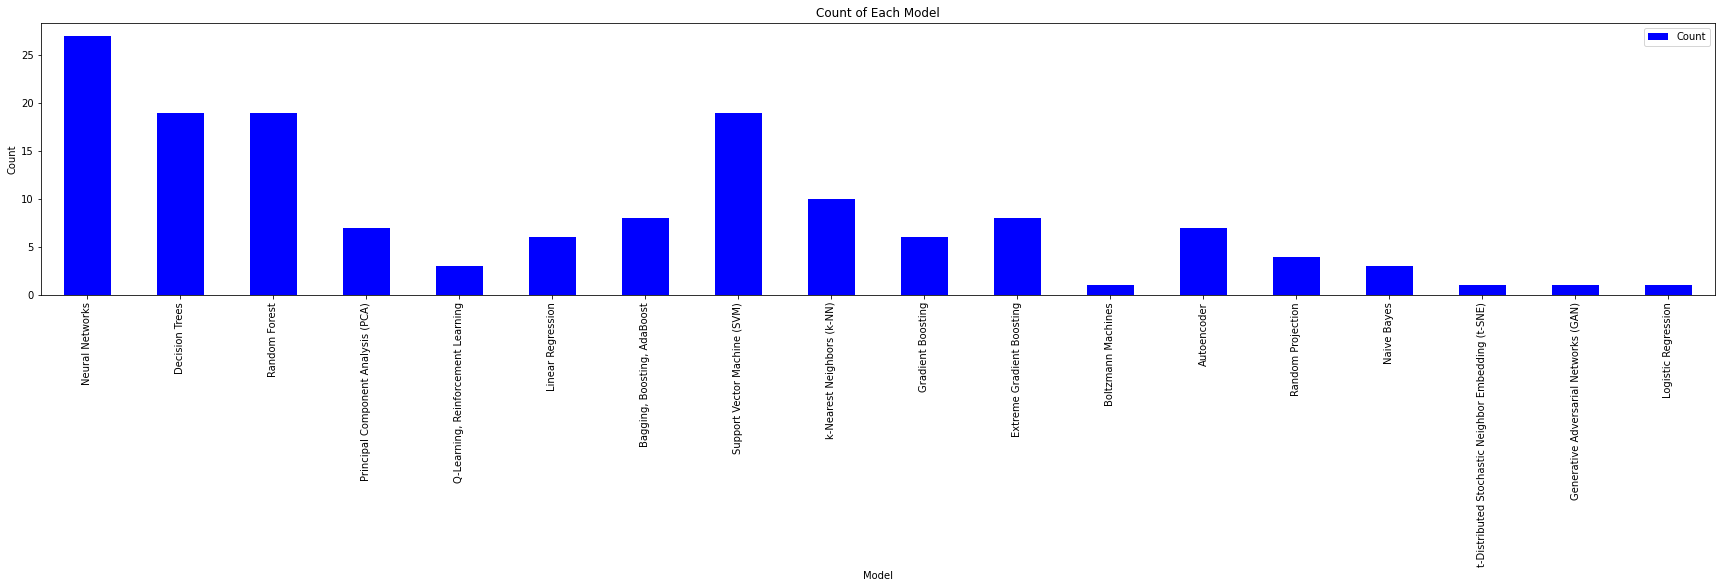

In [38]:
model_list = [model for sublist in papers_dict.values() for model in sublist]
model_count = dict(Counter(model_list))

model_df = pd.DataFrame.from_dict(model_count, orient='index', columns=['Count'])

model_df.plot.bar(y='Count', color='blue', figsize=(30,5))
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Count of Each Model')

plt.show()

In [ ]:
# doc=fitz.open(pdf_file)
# page=doc[0]
# for annot in page.annots(types=[fitz.PDF_ANNOT_TEXT]):
# 	continue
# annot.info

# text = annot.info ["content"]  # but here is what you need
# print(text)

# https://github.com/pymupdf/PyMuPDF/issues/819